# Focus stacking with image bunches¶

Example of focus stacking with:

* detection of noisy pixel map
* masking of noisy pixels
* automatic alignment
* luminosity balance
* focus stacking

In [2]:
import sys
sys.path.append('../')
from focus_stack import *

[INF] noise-map: map noisy pixels, frames in folder: ../tests/input/img-tif                              


noise-map:   0%|          | 0/6 [00:00<?, ?it/s]

[INF] noise-map: hot pixels: rgb: 55, r: 21, g: 11, b: 23                              


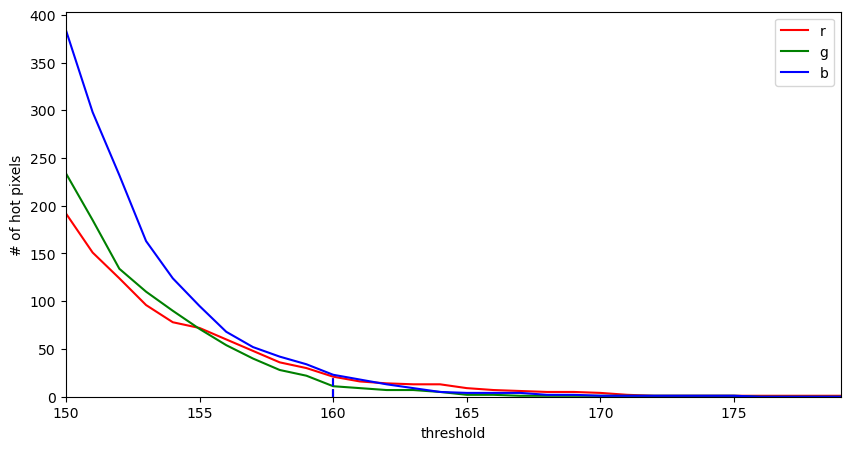

[INF] noise-map: elapsed time: 00:00:00.35s                              
[INF] noise-map: completed                              
[INF] job: elapsed time: 00:00:00.36s                              
[INF] job: completed                              


In [3]:
job = StackJob("job", "../tests")
job.add_action(NoiseDetection("noise-map", input_path=["input/img-tif"],
                              channel_thresholds=(160, 160, 160), plot_range=(150, 180)))
job.run()

[INF] test-ex2-align: begin run                              
[INF] test-ex2-align: : 6 files in folder: ../tests/input/img-tif                              
[INF] test-ex2-align: focus stacking                              


test-ex2-align:   0%|          | 0/6 [00:00<?, ?it/s]

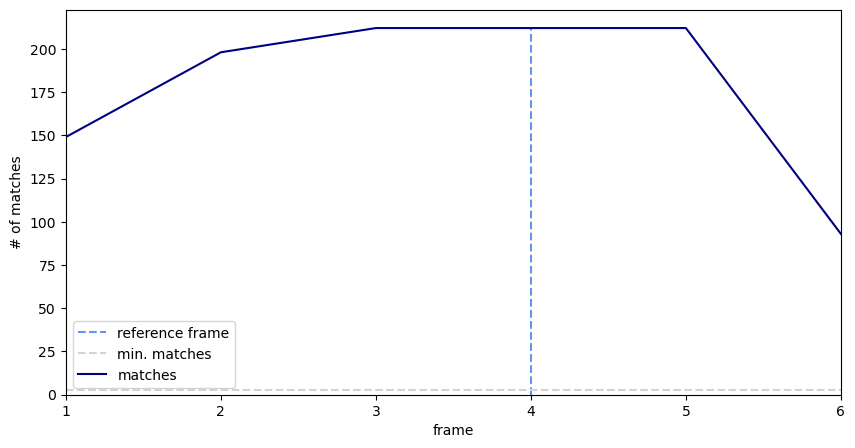

[INF] test-ex2-align:                                                                                           


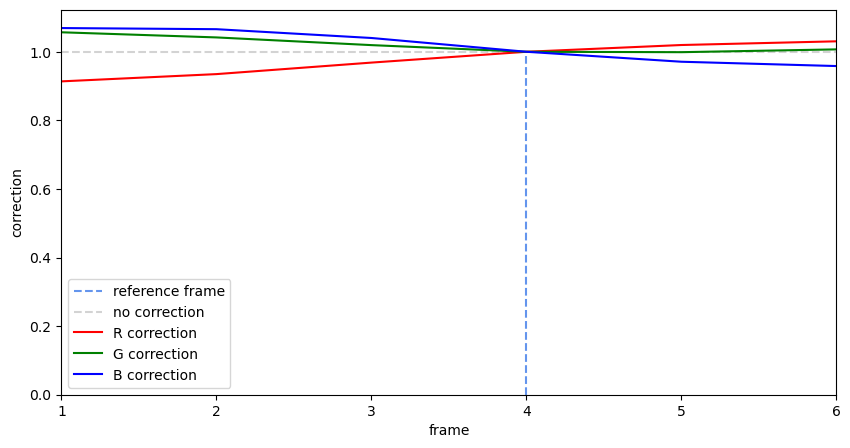

[INF] test-ex2-align: elapsed time: 00:00:14.77s                              
[INF] test-ex2-align: completed                              
[INF] align: : 6 files in folder: ../tests/test-ex2-align                              
[INF] align: focus stacking                              
[INF] align: elapsed time: 00:00:01.86s                                                                     
[INF] align: completed                              
[INF] stack: merging frames in folders: ../tests/input/img-tif, ../tests/test-ex2-stack                              
[INF] stack: frames: 0001.tif, 0000.tif, 0002.tif, 0003.tif, 0004.tif, 0005.tif, 0000_pyramid.tif                              
[INF] stack: reading files                              


In [ ]:
job = StackJob("job", "../tests", input_path="input/img-tif")
job.add_action(Actions("test-ex2-align",
                       [MaskNoise(), AlignFrames(),
                        BalanceFrames(channel=BALANCE_RGB, corr_map=BALANCE_MATCH_HIST)]))
job.add_action(FocusStack("align", PyramidStack(), output_path="output/test-ex2-stack",
               postfix='_pyramid'))
job.add_action(MultiLayer("stack", input_path=['input/img-tif', 'test-ex2-stack'],
                         output_path="output/test-ex2-multilayer"))
job.run()